In [34]:
#data cleaning
import numpy as np
import pandas as pd

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from warnings import filterwarnings
filterwarnings('ignore')

In [35]:
df = pd.read_csv("netflix_titles.csv")

### __Netflix__

In [36]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


__We can see 7787 observations in our dataset__

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


__We divide the "added_date" into columns as day month and year.__

In [38]:
df.insert(6,column="added_year",value="year")
df.insert(6,column="added_month",value="month")
df.insert(6,column="added_day",value="day")

In [39]:
for i in df.loc[~(df.date_added.isnull()),].index:
    df["added_year"][i]=df.date_added[i].split(",")[1]

In [40]:
for i in df.loc[~(df.date_added.isnull()),].index:
     df["added_month"][i]=df.date_added[i].split(" ")[0]

In [41]:
for i in df.loc[~(df.date_added.isnull()),].index:
     df["added_day"][i]=df.date_added[i].split(" ")[1].strip(",")

In [42]:
df.loc[df.added_day=="December","added_month"] = "December"
df.loc[df.added_day=="November","added_month"] = "November" 
df.loc[df.added_day=="October","added_month"] = "October" 
df.loc[df.added_day=="September","added_month"] = "September" 
df.loc[df.added_day=="August","added_month"] = "August" 
df.loc[df.added_day=="July","added_month"] = "July" 
df.loc[df.added_day=="June","added_month"] = "June" 
df.loc[df.added_day=="May","added_month"] = "May" 
df.loc[df.added_day=="April","added_month"] = "April" 
df.loc[df.added_day=="March","added_month"] = "March" 
df.loc[df.added_day=="February","added_month"] = "February" 
df.loc[df.added_day=="January","added_month"] = "January"

df.loc[df.added_day=="December","added_day"] = "day"
df.loc[df.added_day=="November","added_day"] = "day" 
df.loc[df.added_day=="October","added_day"] = "day" 
df.loc[df.added_day=="September","added_day"] = "day" 
df.loc[df.added_day=="August","added_day"] = "day" 
df.loc[df.added_day=="July","added_day"] = "day" 
df.loc[df.added_day=="June","added_day"] = "day" 
df.loc[df.added_day=="May","added_day"] = "day" 
df.loc[df.added_day=="April","added_day"] = "day" 
df.loc[df.added_day=="March","added_day"] = "day" 
df.loc[df.added_day=="February","added_day"] = "day" 
df.loc[df.added_day=="January","added_day"] = "day"

In [43]:
df.index = np.arange(1,len(df)+1)
df.head()

,show_id,type,title,director,cast,country,added_day,added_month,added_year,date_added,release_year,rating,duration,listed_in,description
1,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14,August,2020,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
2,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23,December,2016,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
3,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20,December,2018,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
4,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16,November,2017,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
5,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1,January,2020,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


__We are looking at missing values in our dataset. Most missing observations in the director column (approximately 30% )__

In [44]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
added_day          0
added_month        0
added_year         0
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

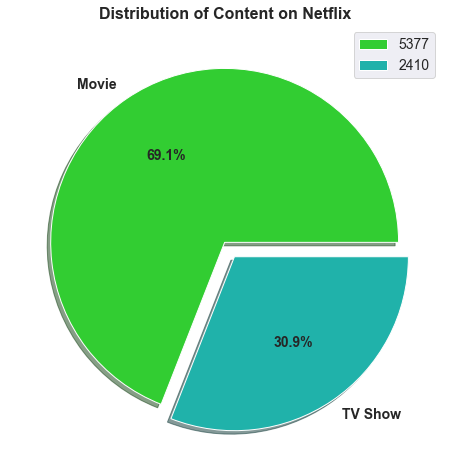

In [45]:
data = df.type.value_counts()
labels = ["Movies","TV Shows"]
pie, ax = plt.subplots(figsize=[12,8])
plt.pie(x =data,autopct="%.1f%%",labels=data.keys(),
        explode = (0, 0.1),colors = ['limegreen', 'lightseagreen'],shadow=True,textprops=dict(fontweight="bold",fontsize=14));
plt.legend(labels=["5377","2410"],loc="upper right",fontsize=14);
plt.title("Distribution of Content on Netflix",dict(fontweight="bold",fontsize=16));

### __Oldest Movies on Netflix__

In [46]:
df.sort_values("release_year",ascending=True).iloc[:,[2,10]][:10]

,title,release_year
4868,Pioneers: First Women Filmmakers*,1925
6118,The Battle of Midway,1942
4961,Prelude to War,1942
7680,WWII: Report from the Aleutians,1943
7343,Undercover: How to Operate Behind Enemy Lines,1943
7617,Why We Fight: The Battle of Russia,1943
7269,Tunisian Victory,1944
6700,The Negro Soldier,1944
6658,The Memphis Belle: A Story of a\nFlying Fortress,1944
5372,San Pietro,1945


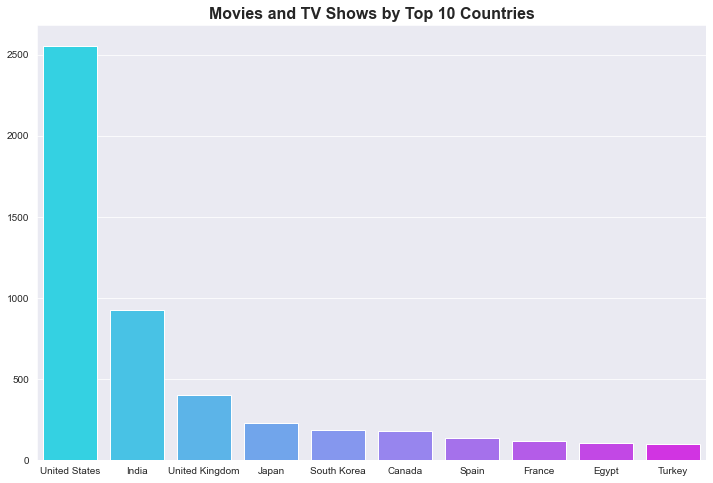

In [47]:
plt.figure(figsize=(12,8));
sns.set_style("darkgrid")
data = df.country.value_counts().sort_values(ascending=False)[:10]
ax = sns.barplot(y=data.values,x=data.index,palette="cool");
plt.title("Movies and TV Shows by Top 10 Countries",dict(fontweight="bold",fontsize=16));

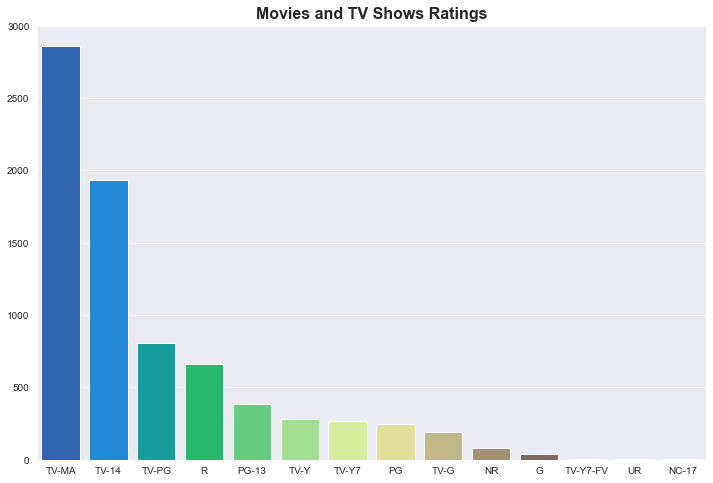

In [48]:
plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
data = df.rating.value_counts().sort_values(ascending=False)
ax = sns.barplot(y=data.values,x=data.index,palette="terrain",);
plt.title("Movies and TV Shows Ratings",dict(fontweight="bold",fontsize=16));

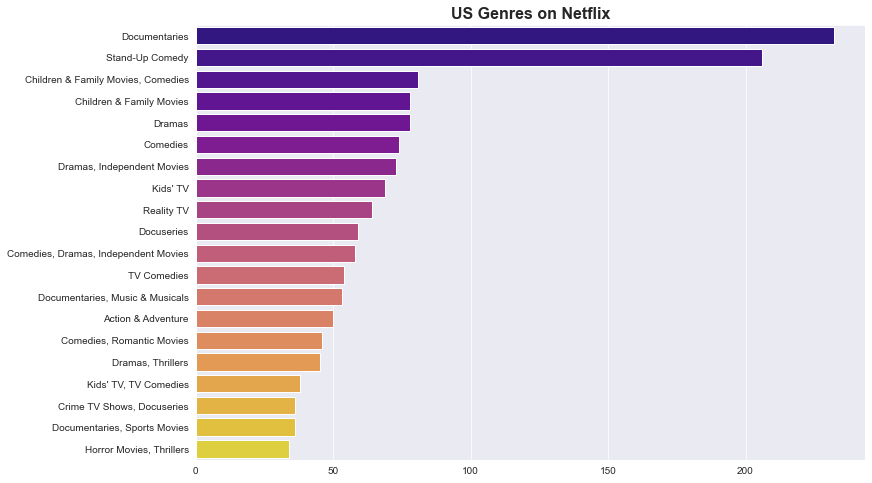

In [49]:
plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
df_usa=df.loc[df.country=="United States",]
data = df_usa.listed_in.value_counts().sort_values(ascending=False)[:20]
ax = sns.barplot(x=data.values,y=data.index,palette="plasma",);
plt.title("US Genres on Netflix",dict(fontweight="bold",fontsize=16));

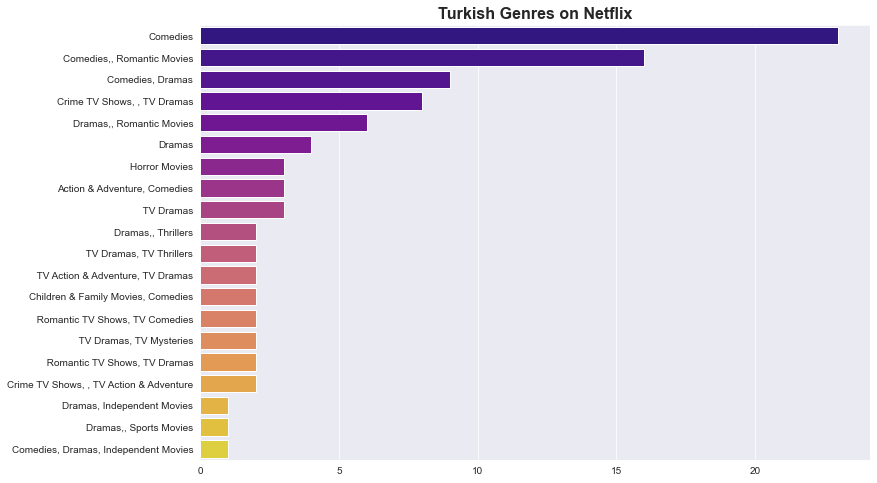

In [50]:
plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
df_tr=df.loc[df.country=="Turkey",]
df_tr.listed_in = df_tr.listed_in.str.replace(" International Movies","")
df_tr.listed_in = df_tr.listed_in.str.replace("International TV Shows","")
df_tr.listed_in = df_tr.listed_in.str.strip(",")
data = df_tr.listed_in.value_counts().sort_values(ascending=False)[:20]
ax = sns.barplot(x=data.values,y=data.index,palette="plasma",);
plt.title("Turkish Genres on Netflix",dict(fontweight="bold",fontsize=16));

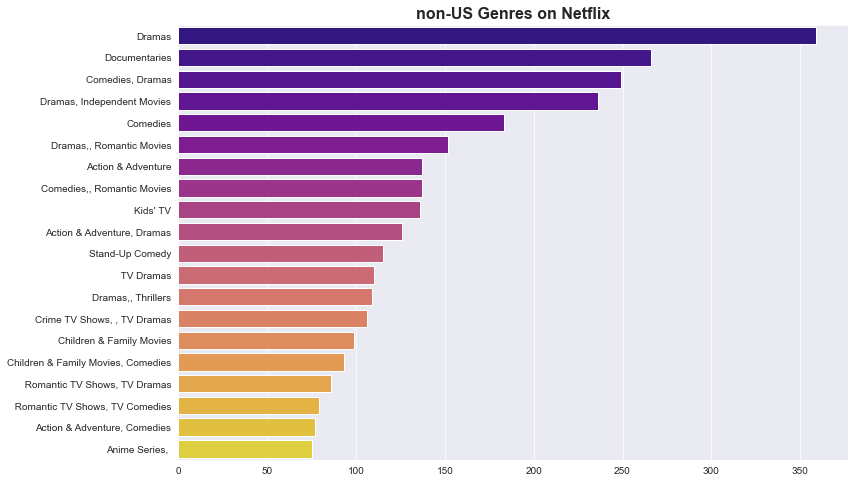

In [51]:
plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
df_non_usa=df.loc[~(df.country=="United States"),]
df_non_usa.listed_in = df_non_usa.listed_in.str.replace(" International Movies","")
df_non_usa.listed_in = df_non_usa.listed_in.str.replace("International TV Shows","")
df_non_usa.listed_in = df_non_usa.listed_in.str.strip(",")
data = df_non_usa.listed_in.value_counts().sort_values(ascending=False)[:20]
ax = sns.barplot(x=data.values,y=data.index,palette="plasma");
plt.title("non-US Genres on Netflix",dict(fontweight="bold",fontsize=16));

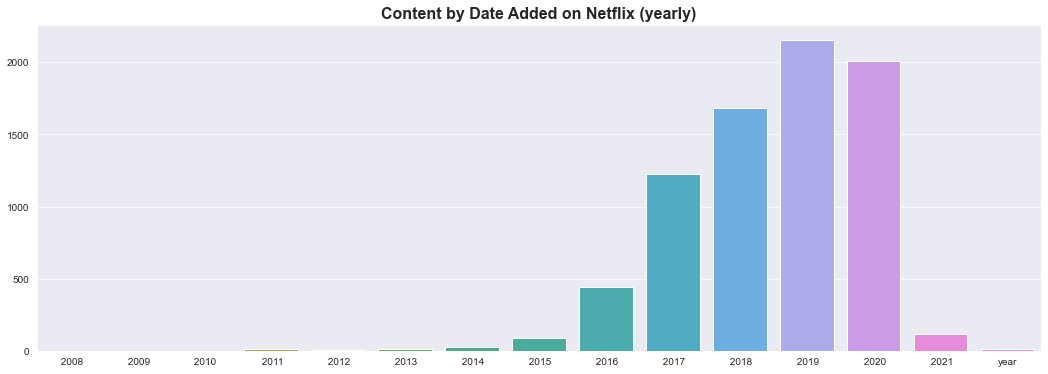

In [52]:
plt.figure(figsize=(18,6));
a=df.added_year.value_counts().sort_index(ascending=True)
ax = sns.barplot(x=a.index,y=a.values);
plt.title("Content by Date Added on Netflix (yearly)",dict(fontweight="bold",fontsize=16));

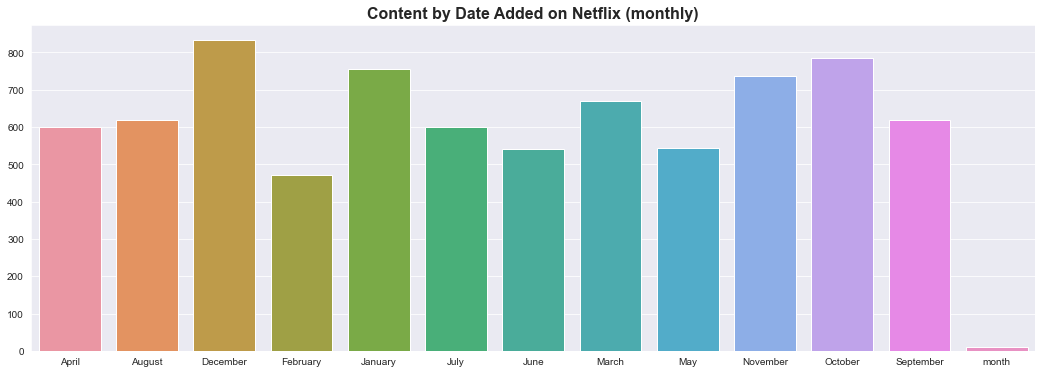

In [53]:
plt.figure(figsize=(18,6));
a=df.added_month.value_counts().sort_index(ascending=True)
ax = sns.barplot(x=a.index,y=a.values);
plt.title("Content by Date Added on Netflix (monthly)",dict(fontweight="bold",fontsize=16));

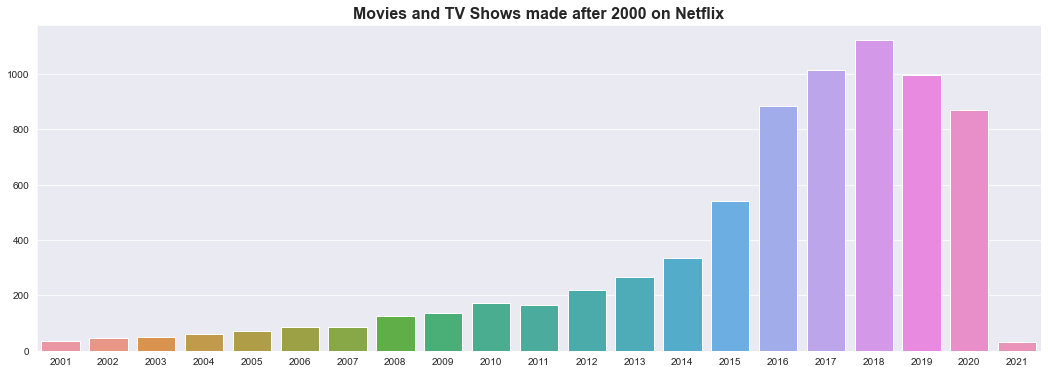

In [54]:
plt.figure(figsize=(18,6));
a=df.release_year.value_counts().sort_index(ascending=False)[:21]
ax = sns.barplot(x=a.index,y=a.values);
plt.title("Movies and TV Shows made after 2000 on Netflix",dict(fontweight="bold",fontsize=16));

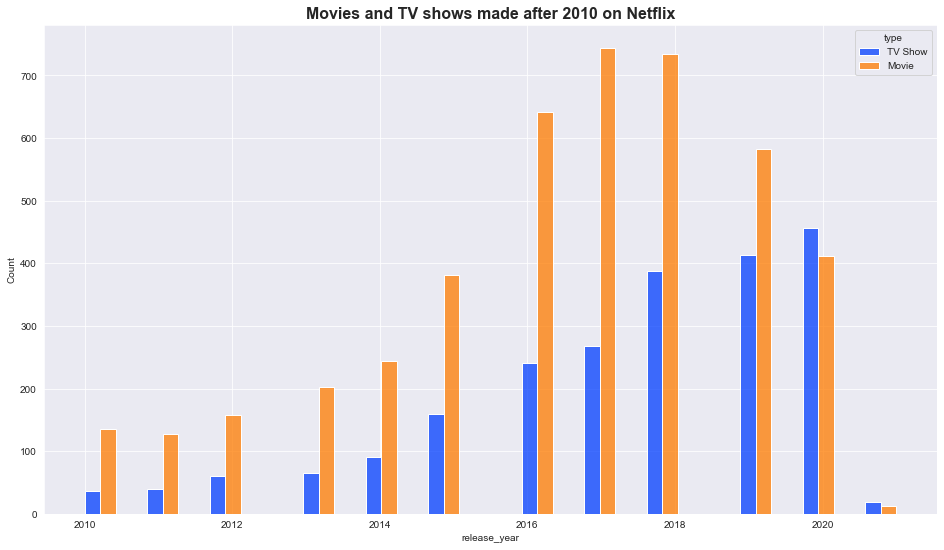

In [55]:
plt.figure(figsize=(16,9));
df_2000 = df.loc[df.release_year>=2010,]
ax = sns.histplot(data=df_2000,x="release_year",hue="type",palette="bright",multiple="dodge");
plt.title("Movies and TV shows made after 2010 on Netflix",dict(fontweight="bold",fontsize=16));

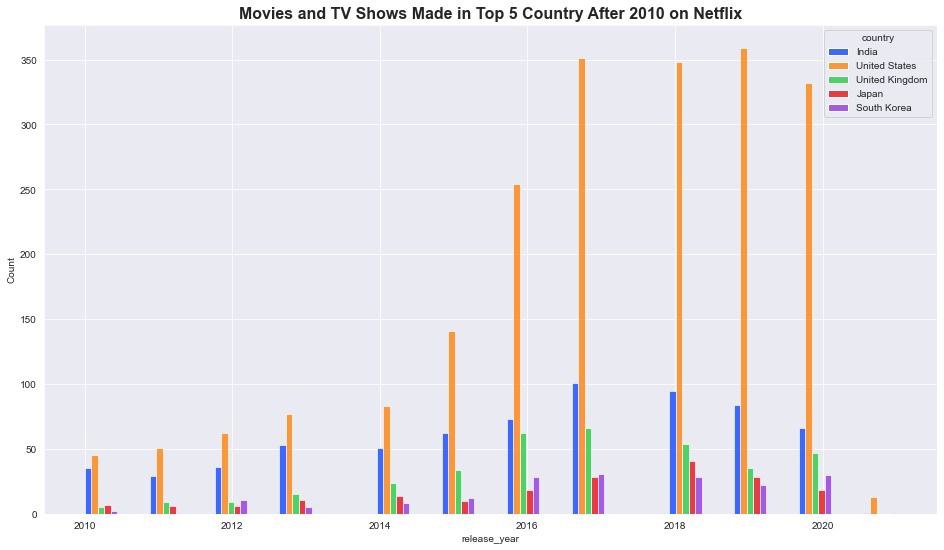

In [56]:
plt.figure(figsize=(16,9));
df_2000 = df.loc[(df.release_year>=2010) & ((df.country=="United States") | (df.country=="India") | (df.country=="United Kingdom") | (df.country=="Japan") | (df.country=="South Korea")) ,]
ax = sns.histplot(data=df_2000,x="release_year",hue="country",palette="bright",multiple="dodge",bins=25);
plt.title("Movies and TV Shows Made in Top 5 Country After 2010 on Netflix",dict(fontweight="bold",fontsize=16));

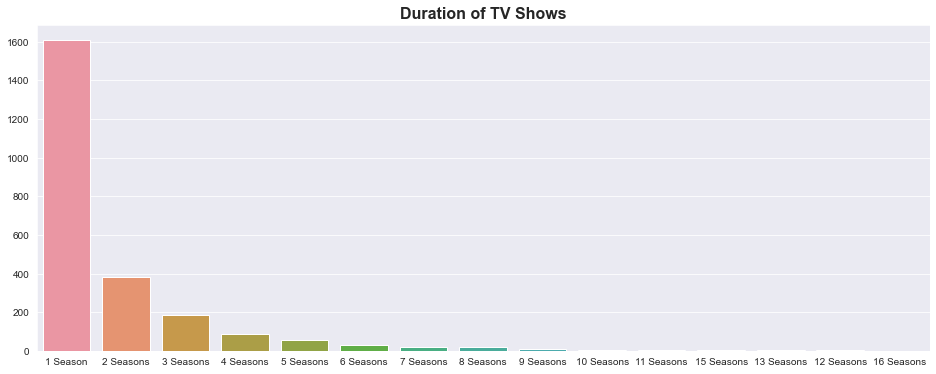

In [57]:
df_tv = df.loc[df.type=="TV Show",]
a = df_tv.duration.value_counts().sort_values(ascending=False)
plt.figure(figsize=(16,6))
ax = sns.barplot(x=a.index,y=a.values);
plt.title("Duration of TV Shows",dict(fontweight="bold",fontsize=16));

In [59]:
df_tv = df.loc[(df.type=="Movie") & ((df.country=="United States") | (df.country=="India") | (df.country=="Japan")),]
df_tv.index=np.arange(1,len(df_tv)+1)

In [60]:
for i in range(1,len(df_tv.duration)+1):
    df_tv.duration[i] = df_tv.duration[i].replace(" min","").strip()

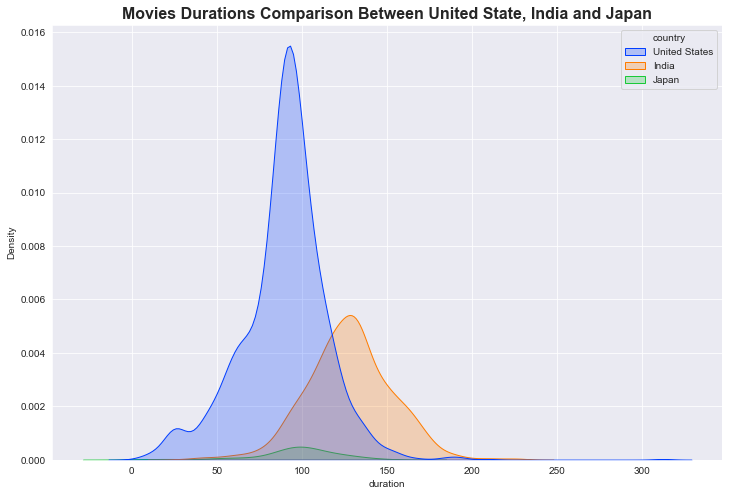

In [61]:
df_tv.duration = df_tv.duration.astype(int)
plt.figure(figsize=(12,8))
ax = sns.kdeplot(data=df_tv,x="duration",hue="country",shade=True,palette="bright");
plt.title("Movies Durations Comparison Between United State, India and Japan",dict(fontweight="bold",fontsize=16));

In [62]:
df_m = df.loc[df.type=="Movie",]

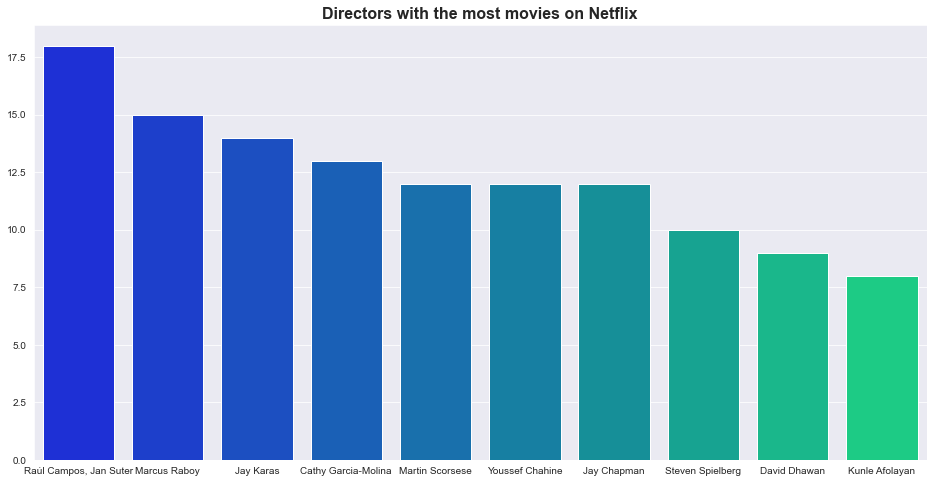

In [63]:
a = df_m.director.value_counts().sort_values(ascending=False)[:10]
plt.figure(figsize=(16,8))
ax = sns.barplot(x=a.index,y=a.values,palette="winter");
plt.title("Directors with the most movies on Netflix",dict(fontweight="bold",fontsize=16));